In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download ayushmi77al/weather-data-set-for-beginners

Dataset URL: https://www.kaggle.com/datasets/ayushmi77al/weather-data-set-for-beginners
License(s): unknown
  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 58.4MB/s]


In [6]:
!unzip /content/weather-data-set-for-beginners.zip

Archive:  /content/weather-data-set-for-beginners.zip
  inflating: 1. Weather Data.csv     


## Importing the Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Loading the dataset
data = pd.read_csv("1. Weather Data.csv")

In [9]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [10]:
rows, columns = data.shape
print(f'The dataframe has {rows} and {columns}')

The dataframe has 8784 and 8


In [11]:
# checking for the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [12]:
# checking for null values
data.isnull().sum()

,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


In [13]:
# checking the datatypes
data.dtypes

,0
Date/Time,object
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


There are no NULL Values

In [14]:
# renaming weather column
data.rename(columns={'Weather': 'Weather_Condition'}, inplace=True)

In [31]:
# Statistical summary
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [15]:
data['Weather_Condition'].value_counts()

,count
Weather_Condition,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


# Find Records Where Wind Speed is Exactly 4 km/h

In [ ]:
# Count records where Wind_Speed_Km_h is 4
wind_speed_4_count = data[data['Wind Speed_km/h'] == 4].shape[0]
print(f'Number of records where wind speed is exactly 4 km/h: {wind_speed_4_count}')

Number of records where wind speed is exactly 4 km/h: 474


#  What is the mean visibility of the dataset?

In [17]:
mean_visibility = round(data['Visibility_km'].mean(), 2)
print(f'Mean visibility: {mean_visibility}')

Mean visibility: 27.66


# Find the number of records where the wind speed is greater than 24 km/hr and visibility is equal to 25 km.

In [18]:
records_count = data[(data['Wind Speed_km/h'] > 24) & (data['Visibility_km'] == 25)].shape[0]
print(f'Number of records where wind speed > 24 km/h and visibility = 25 km: {records_count}')


Number of records where wind speed > 24 km/h and visibility = 25 km: 308


# Mean Value of Each Column for Each Weather Condition

In [19]:
mean_values_by_weather = data.groupby('Weather_Condition').agg({
    'Temp_C': 'mean',
    'Dew Point Temp_C': 'mean',
    'Rel Hum_%': 'mean',
    'Visibility_km': 'mean',
    'Press_kPa': 'mean'
})
print(mean_values_by_weather)


                                            Temp_C  Dew Point Temp_C  \
Weather_Condition                                                      
Clear                                     6.825716          0.089367   
Cloudy                                    7.970544          2.375810   
Drizzle                                   7.353659          5.504878   
Drizzle,Fog                               8.067500          7.033750   
Drizzle,Ice Pellets,Fog                   0.400000         -0.700000   
Drizzle,Snow                              1.050000          0.150000   
Drizzle,Snow,Fog                          0.693333          0.120000   
Fog                                       4.303333          3.159333   
Freezing Drizzle                         -5.657143         -8.000000   
Freezing Drizzle,Fog                     -2.533333         -4.183333   
Freezing Drizzle,Haze                    -5.433333         -8.000000   
Freezing Drizzle,Snow                    -5.109091         -7.07

#Find all instances where the weather is clear and the relative humidity is greater than 50, or visibility is above 40.

In [20]:
# Count instances with conditions
clear_and_humidity_or_visibility = data[(data['Weather_Condition'] == 'Clear') & ((data['Rel Hum_%'] > 50) | (data['Visibility_km'] > 40))].shape[0]
print(f'Number of instances where weather is clear and relative humidity > 50 or visibility > 40: {clear_and_humidity_or_visibility}')


Number of instances where weather is clear and relative humidity > 50 or visibility > 40: 1220


# Find the number of weather conditions that include snow.

In [21]:
snow_count = data[data['Weather_Condition'] == 'Snow'].shape[0]
print(f'Number of weather conditions that include snow: {snow_count}')

Number of weather conditions that include snow: 390


In [22]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather_Condition'],
      dtype='object')

## EDA

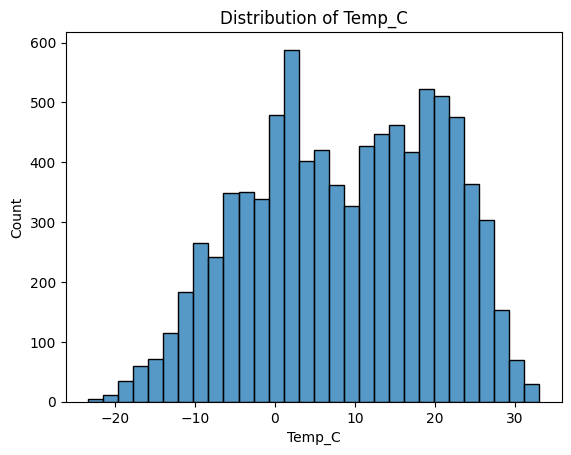

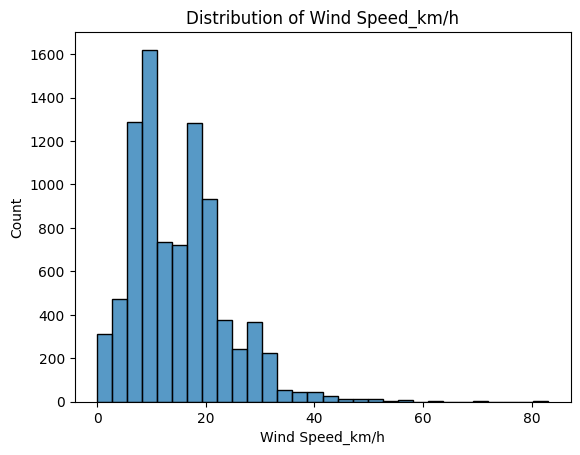

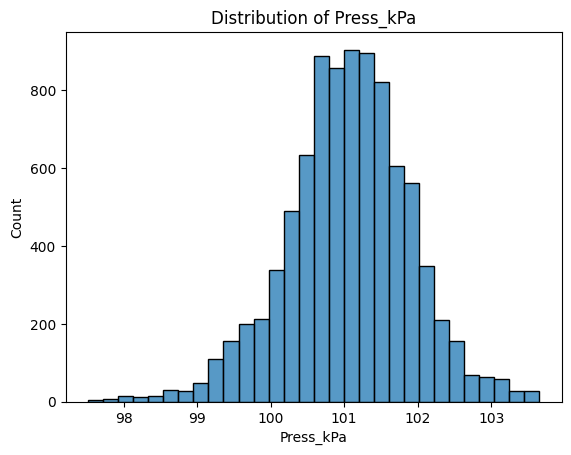

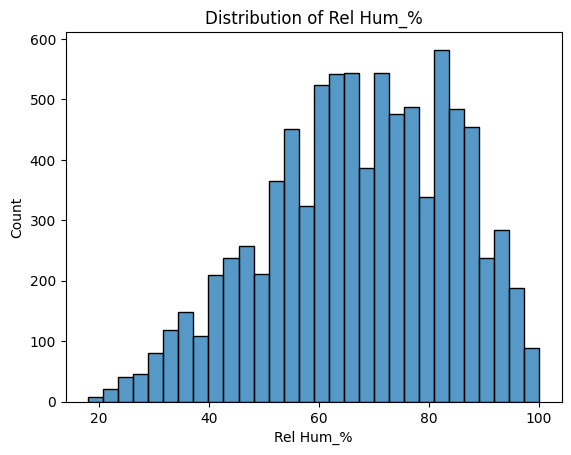

In [25]:
# List of columns
columns = ['Temp_C', 'Wind Speed_km/h','Press_kPa', 'Rel Hum_%']

# histogram for each numerical attribute
for column in columns:
  sns.histplot(data=data, x=column, bins=30)
  plt.title(f'Distribution of {column}')
  plt.show()

Observations: Apart from the Wind_speed, distribution is mainly skewed to the right

## Multivariate Analysis

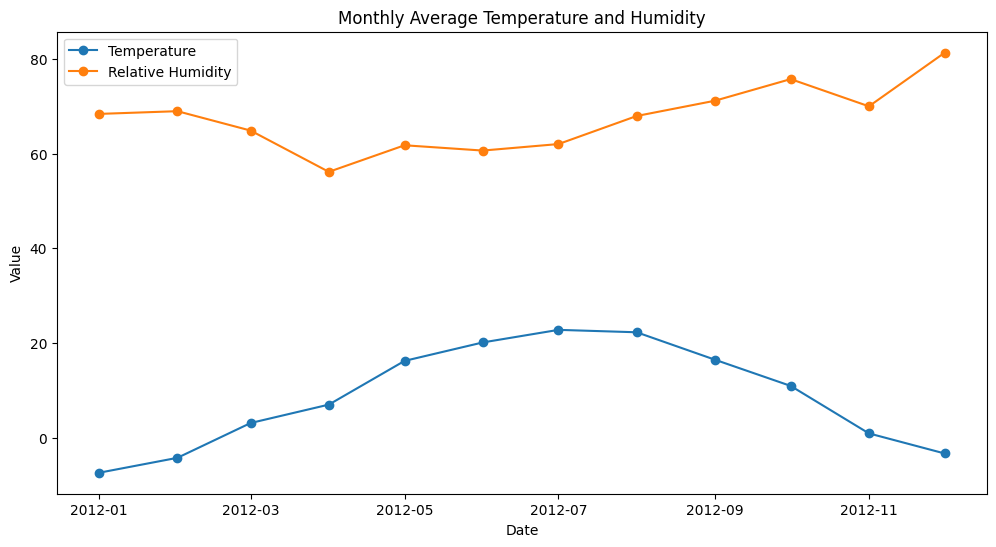

In [35]:

# Converting the 'Date/Time' column to datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%m/%d/%Y %H:%M')

# Extract year and month from the 'Date/Time' column
data['YearMonth'] = data['Date/Time'].dt.to_period('M')

# Aggregating the data by month and year
monthly_data = data.groupby('YearMonth').agg({
    'Temp_C': 'mean',          # Mean temperature for each month
    'Rel Hum_%': 'mean'        # Mean relative humidity for each month
}).reset_index()

# Convert 'YearMonth' back to datetime for plotting
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

# Plot the temperature and humidity against the YearMonth column
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Temp_C'], label='Temperature', marker='o')
plt.plot(monthly_data['YearMonth'], monthly_data['Rel Hum_%'], label='Relative Humidity', marker='o')

# labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Monthly Average Temperature and Humidity')
plt.legend()

# Show the plot
plt.show()


## Correlations

<Axes: >

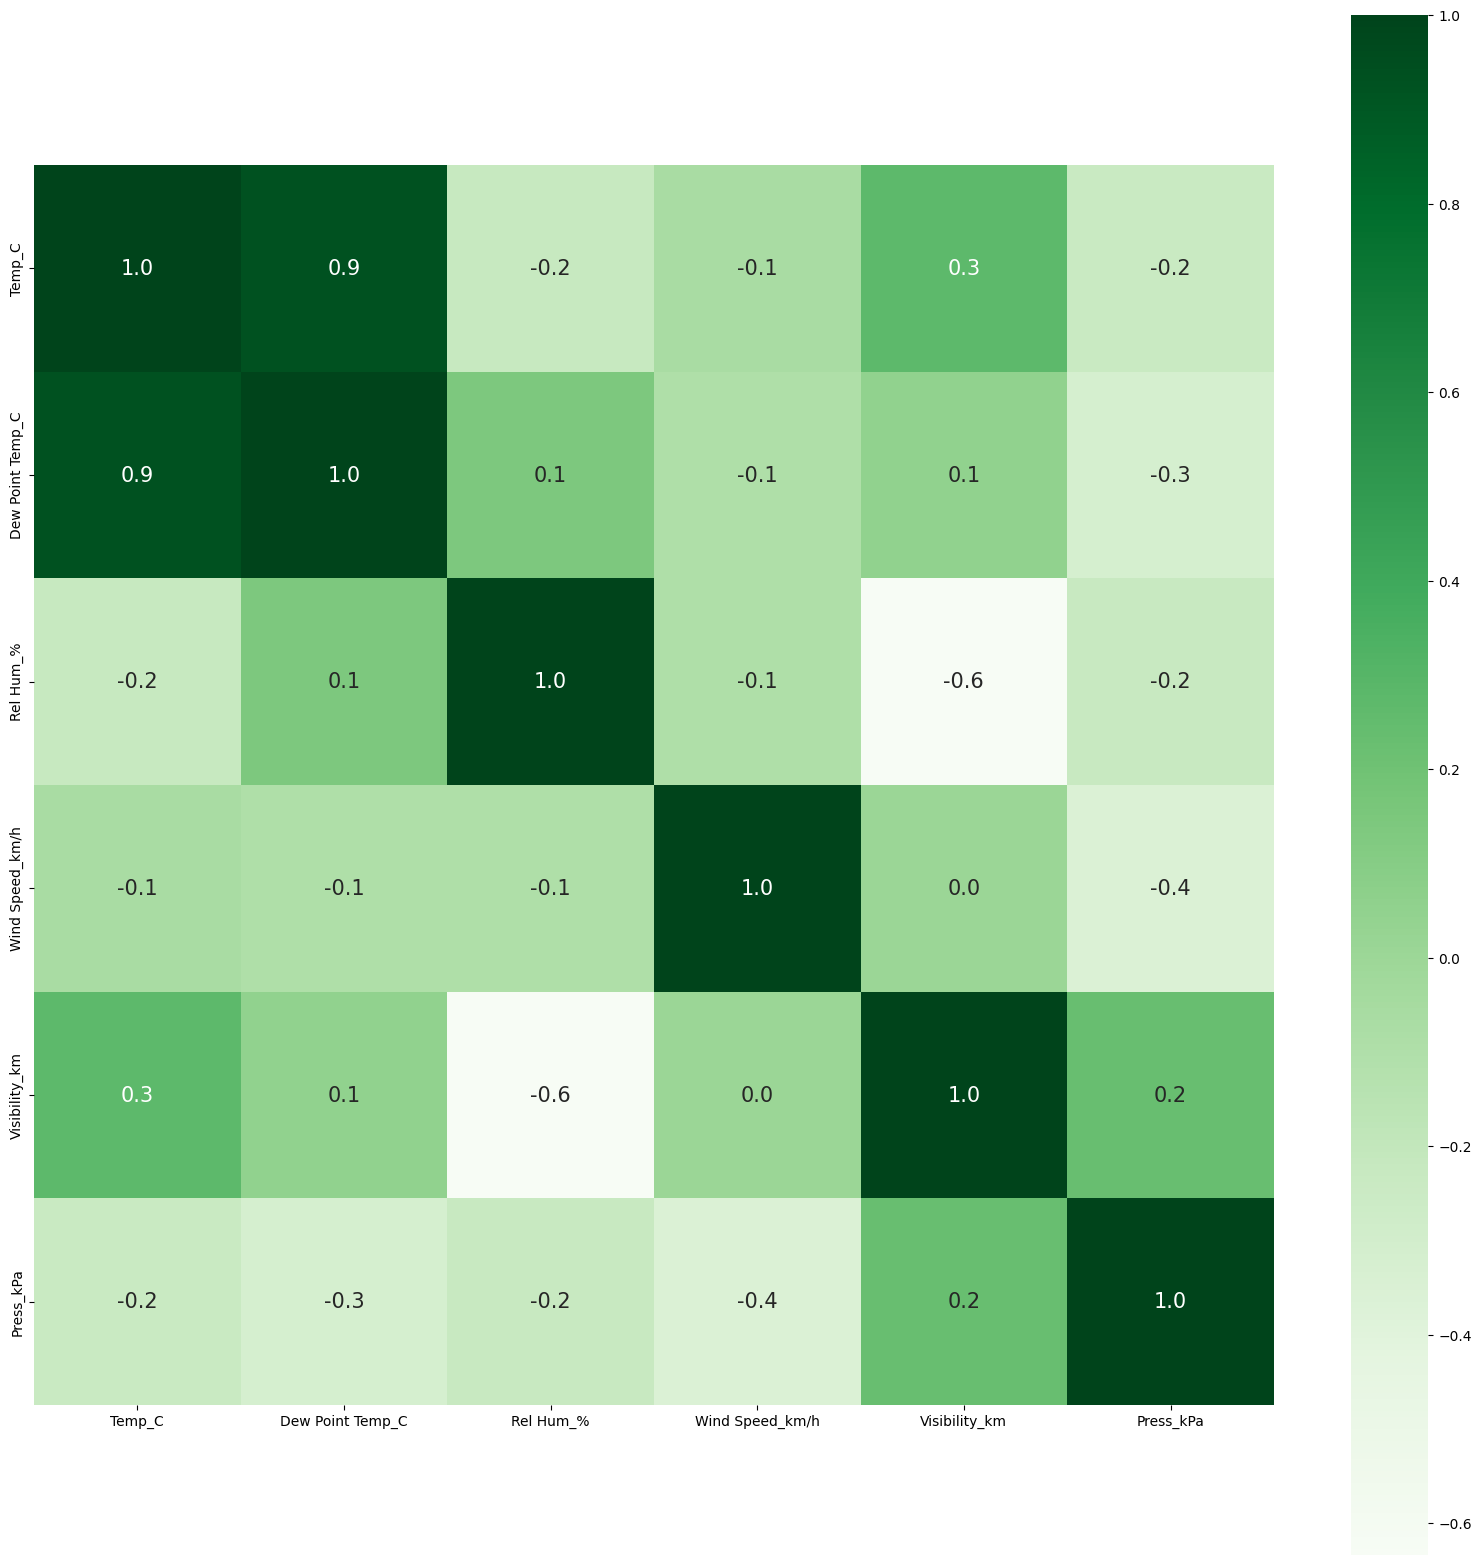

In [32]:
# Numerical data for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

#correlation anaysis fr numeric columns
corr = numeric_data.corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Insights
The folowing insights were obtained from the analysis
 * 👉 The months of May to August had high temperatures.
 * 👉 As the tempreatures were rising, the relative humidity was falling and vice versa.
 * 👉 Apart from the Wind_speed, distribution is mainly skewed to the right.